# 图像处理基本操作

#1 图像存储

##1.1 位图模式
位图模式是1位深度的图像。它只是黑和白两种颜色。它可以由扫描或置入黑色的矢量线条图像生成，也能由灰度模式或双色调模式转换而成。其他图像模式不能直接转换为位图模式

##1.2 灰度模式
灰度模式是8位深度的图像模式。也就是$2^8$=256，在全黑和全白之间插有254个灰度等级的颜色来描绘灰度模式的图像。所有模式的图像都能换成灰度模式，甚至位图也可转换为灰度模式。Photoshop几乎所有的功能都支持灰度模式。$Gray = R*0.3 + G*0.59 + B*0.11$

##1.3 双色调模式
双色调模式不是单个的图像模式，而是一个分类。它仅仅是单色调、双色调、三色调和四色调的一个统称。双色调模式只有一个通道。双色调模式和位图模式一样，也只有灰度模式才能转换

##1.4 RGB颜色空间
- 加法混色
- 3通道：Red通道、Green通道、Blue通道
- 像素值：(b,g,r)
- 取值范围:0~255
![images](../images/12/01.png)

##1.5 CMY(K)颜色空间
- 减法混色，主要用于印刷
- 4通道：Cyan(天蓝)通道、Magenta(玫红)通道、Yellow通道、Key通道
- 像素值:(c,m,y,k)
- 取值范围：0~255
![images](../images/12/02.png)

##1.6 HSV/HSL(I)颜色空间
- 人类视觉概念，画家配色
- 3通道：H/Hue通道(色调，颜色种类)、S/Saturation(饱和度，颜色浓淡)、V/value(明度，颜色明亮度)、L/Lightness(亮度，光照亮度)
- 像素值:(h,s,v/l/i)
- 取值范围:0~255

下图为色调![images](../images/12/03.png)

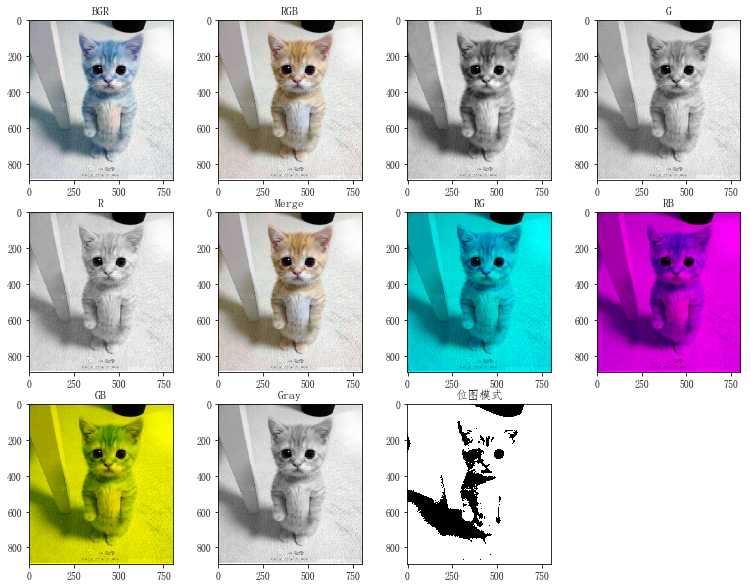

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

plt.figure(figsize=(13,10), facecolor='w')
image_BGR = cv2.imread('images/12/Cat.jpg')
plt.subplot(3,4,1)
plt.title('BGR')
plt.imshow(image_BGR)

image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
plt.subplot(3,4,2)
plt.title('RGB')
plt.imshow(image_RGB)

r,g,b = cv2.split(image_RGB)
plt.subplot(3,4,3)
plt.title('B')
plt.imshow(b, cmap='gray')

plt.subplot(3,4,4)
plt.title('G')
plt.imshow(g, cmap='gray')

plt.subplot(3,4,5)
plt.title('R')
plt.imshow(r, cmap='gray')

image_Ex = cv2.merge([r,g,b])
plt.subplot(3,4,6)
plt.title('Merge')
plt.imshow(image_Ex)

t = np.zeros((image_BGR.shape[0],image_BGR.shape[1]), dtype=image_BGR.dtype)
image_Ex = cv2.merge([r,g, t])
plt.subplot(3,4,7)
plt.title('RG')
plt.imshow(cv2.cvtColor(image_Ex, cv2.COLOR_BGR2RGB))

image_Ex = cv2.merge([r,t, b])
plt.subplot(3,4,8)
plt.title('RB')
plt.imshow(cv2.cvtColor(image_Ex, cv2.COLOR_BGR2RGB))

image_Ex = cv2.merge([t,g, b])
plt.subplot(3,4,9)
plt.title('GB')
plt.imshow(cv2.cvtColor(image_Ex, cv2.COLOR_BGR2RGB))

image_Gray = cv2.cvtColor(image_RGB, cv2.COLOR_RGB2GRAY)
plt.subplot(3,4,10)
plt.title('Gray')
plt.imshow(image_Gray, cmap='gray')

image_bit = image_Gray.copy()
for i in range(image_bit.shape[0]):
    for j in range(image_bit.shape[1]):
        if image_bit[i,j] <=128:
            image_bit[i,j] = 0
        else:
            image_bit[i,j] = 255
plt.subplot(3,4, 11)
plt.title('位图模式')
plt.imshow(image_bit,cmap='gray')

plt.show()

#2 傅里叶变换与滤波器

##2.1 傅里叶变换
人们所看到的波形都是有其它波形叠加而成的，同样这个概念对操作图片也非常有帮助，因为这样我们可以区分图像里哪些区域的信号或像素变化特别强，从而可以任意的标记噪声区域、感兴趣区域、前景和背景等，通过傅里叶变换就可以分离这些频率来理解图像和提取感兴趣的数据

一个信号可以有足够多个不同频率和幅值的正余弦波$A*sin(\omega{x}) + B*cos(\omega{x})$

###2.1.1 矩形波
公式$A\sum_{k=1}^{\infty}\frac{1}{k}sin(2\pi{k}t)$，我们的目的是要组合成下面的矩形波![images](../images/12/15.png)
过程如下![images](../images/12/16.png)
最下排的前两个波，组合成了第一排的第一个波，下排的前三个波，就组合成了第一排的第二个波，以此类推，等到上排的最后一个波，那就基本近似为矩形波了

###2.1.2 信号分解
![images](../images/12/17.png)

##2.2 高通滤波器与低通滤波器
- 高通就是高频率的波段能通过，高频段表现在图像上就是变化大的那部分，通常是某两部分的连接区域，这两部分有着明显差异，那么它们的连接区域反应在频谱上就是高频部分。一般地讲，高通可用于边缘检测
- 低通就是地频率的波段能通过，低频段表现在图像上就是变化小的那部分，用于图像平滑

#3 金字塔

##3.1 高斯金字塔
对一张图片进行多次高斯卷积之后，图像会越来越模糊，有些像素就是多余的，那么就可以做一下降维，具体操作就是先做n次高斯卷积，然后做n次二维降采样，这就是n层金字塔.这样做的目的就是为了捕捉不同尺寸的物体。

降采样就是把偶数行偶数列扔掉，如果先做了高斯卷积之后，会避免一些信息的损失
![images](../images/12/18.png)

##3.2 拉普拉斯金字塔(Laplacian)
高频细节信息在卷积核和降采样中丢失，拉普拉斯金字塔可以保留所有层所丢失的高频信息，用于图像恢复$L_i=G_i-UP(G_{i+1}) \oplus \psi_{5*5}$。第i层的拉普拉斯就等于第i层的高斯减去对第i+1层的高斯结果进行上采样乘以一个高斯卷积核

由公式可以看出，拉普拉斯金字塔需要跟高斯金字塔配合才能进行图像恢复；如果图像不会被恢复，那么就没有必要做拉普拉斯金字塔
![images](../images/12/19.png)
红框中是做的高斯金字塔操作，绿框做的是拉普拉斯金字塔操作，蓝框做的是图片的恢复操作。其中，红框和蓝框中的三张图片是一样的


#4 模板匹配

##4.1 模板图片匹配 VS 卷积
- 作用：同尺度目标检测
- 模板：真是图片 VS 卷积核
- 操作：使用模板图片扫描整个图片 VS 卷积扫描
- 匹配结果：相似度量 VS 权重相加。模板匹配是使用一副模板图，在原图中找到相似的部分。所以肯定需要用到相似距离的计算，主要有六种：欧氏距离、标准化欧氏距离、相关、标准化相关、去均值相关，标准化去均值相关
![images](../images/12/20.png)

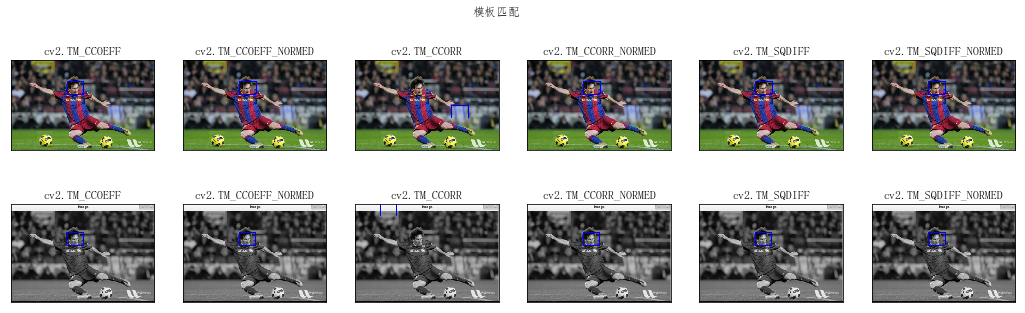

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

img = cv2.imread('images/12/messi1.jpg')
img2 = img.copy()
template = cv2.imread('images/12/template.jpg')
w, h = template.shape[:-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
plt.figure(figsize=(18,5), facecolor='w')
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
for i, meth in enumerate(methods):
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(2,6, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(meth)
    plt.xticks([]), plt.yticks([])

img = cv2.imread('images/12/messi5.jpg')
img2 = img.copy()
for i, meth in enumerate(methods):
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(2,6, i+7)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(meth)
    plt.xticks([]), plt.yticks([])
    
plt.suptitle(u'模板匹配')
plt.show()